# Spotify Listening History Analysis

![Spotify Image](spotify-logo.jpg)

## Author: PH Kaumbu

## Student Number: 220080995

## Source: Personal Data from Spotify

## Github Url: https://github.com/iam-hbk/Spotify-Data-Analysis.git

## Project Overview

This project aims to perform descriptive analysis on personal Spotify listening history. The objective is to uncover patterns, trends, and insights into my music listening habits over time. By analyzing my streaming history and library data provided by Spotify, I hope to gain a deeper understanding of my music preferences and how they have evolved.

## Data Description

The data comes in JSON format, divided into three main categories:

- **Streaming History:** Contains detailed records of songs listened to, including artist name, track name, end time, and listening duration. We have three files representing different time periods.
- **Library Information:** Provides information about the tracks saved in the Spotify library, including artist name, album name, and track details.

## Analysis Steps

1. **Data Loading:** Load the JSON files into pandas DataFrames for easy manipulation and analysis.
2. **Data Cleaning:** Inspect the data for inconsistencies, missing values, or anomalies that could skew the analysis. Standardize the data formats if necessary.
3. **Exploratory Data Analysis (EDA):**
   - Analyze listening trends over time.
   - Identify top artists, albums, and tracks.
   - Explore listening habits (e.g., most active listening times/days).
4. **Insights and Visualization:** Use graphs and charts to visualize findings from the EDA. Highlight any interesting patterns or insights about listening preferences and habits.
5. **Conclusions:** Summarize the key takeaways and any potential recommendations for future listening based on the analysis.

## Interesting Facts and Learnings

(As we progress through the analysis, this section will be populated with any interesting findings, patterns, or insights derived from the data.)


## 1. Data Loading

There is a requirements file in the same directory as this script
`pip install -r requirements.txt` to install the required packages


### Imports


In [222]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud

In [223]:
print(os.getcwd())  # To get a sense of where we are

# Load one of the streaming history files
streaming_history_path = "StreamingHistory_music_0.json"

# Load the data into a pandas dataframe
streaming_history_df = pd.read_json(streaming_history_path)

# Display the first few rows of the dataframe to understand its structure
streaming_history_df.head()

/Users/heritierkaumbu/Documents/Bcom Hons IS/Learning From Data/Spotify Account Data


,endTime,artistName,trackName,msPlayed
0,2023-03-10 22:58,Hot Chelle Rae,Don't Say Goodnight,119586
1,2023-03-11 05:20,Florocka,Twale,256998
2,2023-03-11 05:27,Banky W.,My Destiny,435472
3,2023-03-11 05:42,DOE,What I'm Waiting For,170589
4,2023-03-11 18:14,DJ Khaled,"All I Do Is Win (feat. T-Pain, Ludacris, Snoop...",232506


The first streaming history file has been successfully loaded, and here's a glimpse into its structure:

- **endTime:** The timestamp when the listening session ended.
- **artistName:** The name of the artist.
- **trackName:** The name of the track.
- **msPlayed:** The duration of the track played in milliseconds.

With this structure in mind, we can proceed to load all streaming history data and the library information to perform a comprehensive analysis. Let's move on to combining all streaming history data into a single DataFrame for a more extensive exploration.


In [224]:
# Paths to all streaming history files
streaming_files = [
    "StreamingHistory_music_0.json",
    "StreamingHistory_music_1.json",
    "StreamingHistory_music_2.json",
]

# Load and concatenate all streaming history data
all_streaming_df = pd.concat(
    [pd.read_json(file) for file in streaming_files], ignore_index=True
)

# Display basic information about the combined DataFrame
all_streaming_df.info()

# Preview the first few rows of the combined DataFrame
all_streaming_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28110 entries, 0 to 28109
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     28110 non-null  object
 1   artistName  28110 non-null  object
 2   trackName   28110 non-null  object
 3   msPlayed    28110 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 878.6+ KB


,endTime,artistName,trackName,msPlayed
0,2023-03-10 22:58,Hot Chelle Rae,Don't Say Goodnight,119586
1,2023-03-11 05:20,Florocka,Twale,256998
2,2023-03-11 05:27,Banky W.,My Destiny,435472
3,2023-03-11 05:42,DOE,What I'm Waiting For,170589
4,2023-03-11 18:14,DJ Khaled,"All I Do Is Win (feat. T-Pain, Ludacris, Snoop...",232506


Loaded the Spotify streaming history into a DataFrame, revealing 28,110 entries detailing my listening sessions. The data is clean, with each record showing when I finished listening to a track, who the artist was, the track name, and how long I listened.


Here is some more information about the data with some additional columns derived during the data exploration


In [225]:
all_streaming_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28110 entries, 0 to 28109
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     28110 non-null  object
 1   artistName  28110 non-null  object
 2   trackName   28110 non-null  object
 3   msPlayed    28110 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 878.6+ KB


### Initial Observations:

- All data is present and accounted for—no cleaning required.
- Memory usage is minimal, so we're good to handle the data in-memory.

### Next Steps:

The plan is to convert listening time to minutes, identify top artists and tracks, look for listening patterns over time, and present these insights visually.

Let's dive into the data and see what my music preferences reveal about me!


# 2. Exploratory Data Analysis (EDA)


In [226]:
# Convert 'msPlayed' to 'minutesPlayed' for better readability
all_streaming_df["minutesPlayed"] = all_streaming_df["msPlayed"] / 60000

# Calculate total listening time in minutes
total_listening_minutes = all_streaming_df["minutesPlayed"].sum()
print(f"Total Listening Time: {total_listening_minutes} minutes")

# Calculate the average listening time per track in minutes
average_track_length_minutes = all_streaming_df["minutesPlayed"].mean()
print(f"Average Track Length: {average_track_length_minutes:.2f} minutes")

# Find the most common artist - the mode for 'artistName'
most_common_artist = all_streaming_df["artistName"].mode()[0]
print(f"Most Common Artist: {most_common_artist}")

# Find the most common track - the mode for 'trackName'
most_common_track = all_streaming_df["trackName"].mode()[0]
print(f"Most Common Track: {most_common_track}")

# Standard Deviation for 'minutesPlayed' - measures the amount of variation or dispersion of listening times
std_dev_listening_times = all_streaming_df["minutesPlayed"].std()
print(f"Standard Deviation of Listening Times: {std_dev_listening_times:.2f} minutes")

# Median of 'minutesPlayed' - a better measure of central tendency when data is skewed
median_listening_time = all_streaming_df["minutesPlayed"].median()
print(f"Median Listening Time per Track: {median_listening_time:.2f} minutes")

Total Listening Time: 88115.27513333334 minutes
Average Track Length: 3.13 minutes
Most Common Artist: Hillsong Instrumentals
Most Common Track: My Blessings (Love Me)
Standard Deviation of Listening Times: 1.70 minutes
Median Listening Time per Track: 3.22 minutes


- **Total Listening Time:** 88,115.28 minutes spent on Spotify. That's about 61 days of music! It showcases the significant portion of time music occupies in my daily life.
- **Average Track Length:** At 3.13 minutes per track, it's clear that I favor songs of a typical length, suggesting a preference for standard, radio-friendly tracks.

- **Most Common Artist:** Hillsong Instrumentals topping the list indicates a strong inclination towards their music, that's because I'm a Chistian that code 😂. Helps with focus.

- **Most Common Track:** 'My Blessings (Love Me)' as the most frequently played track. I really loved that song. It resonates with me on a personal level, both for its melody or lyrics. I have been practicing gratefulness and appreciation for my life and the positive things going on in it.

- **Standard Deviation of Listening Times:** A standard deviation of 1.70 minutes points to a relatively consistent track length preference with some variety.

- **Median Listening Time per Track:** The median time of 3.22 minutes is close to the average, reinforcing that most tracks I listen to are around the standard song length.

Let’s break down these next steps:

1. **Temporal Analysis**: Identify any patterns based on the `endTime` column to see when I listen to music the most, possibly by extracting the hour of the day or the day of the week from the timestamps.
2. **Variability in Listening Sessions**: Use the standard deviation to explore how varied my listening sessions are. A higher standard deviation would indicate that the length of time I spend listening varies more significantly from session to session.
3. **Genre Exploration**: If available, categorize tracks by genre and analyze which genres I listen to most often, and see if there are shifts in genre preference over time.
4. **Engagement Over Time**: Calculate metrics like the total number of tracks listened per day or month to evaluate my engagement over the period represented by the data.


In [227]:
# Convert 'endTime' to datetime format and create new columns for day of the week and hour of the day
all_streaming_df["endTime"] = pd.to_datetime(all_streaming_df["endTime"])

all_streaming_df["dayOfWeek"] = all_streaming_df["endTime"].dt.day_name()
all_streaming_df["hourOfDay"] = all_streaming_df["endTime"].dt.hour

# Calculate the total listening time for each day of the week
total_listening_time_by_day = (
    all_streaming_df.groupby("dayOfWeek")["minutesPlayed"].sum().sort_values()
)

# Calculate the mean listening time for each hour of the day
average_listening_time_by_hour = (
    all_streaming_df.groupby("hourOfDay")["minutesPlayed"].mean().sort_values()
)

# Determine the most active listening day of the week
most_active_listening_day = total_listening_time_by_day.idxmax()

# Determine the most active listening hour of the day
most_active_listening_hour = average_listening_time_by_hour.idxmax()

# Calculate the variability in listening sessions across different hours of the day
variability_by_hour = all_streaming_df.groupby("hourOfDay")["minutesPlayed"].std()

# Find the median listening time by day of the week
median_listening_time_by_day = (
    all_streaming_df.groupby("dayOfWeek")["minutesPlayed"].median().sort_values()
)

# Print out the calculated metrics
print(f"Total Listening Time by Day:\n{total_listening_time_by_day}\n")
print(f"Average Listening Time by Hour:\n{average_listening_time_by_hour}\n")
print(f"Most Active Listening Day: {most_active_listening_day}")
print(f"Most Active Listening Hour: {most_active_listening_hour} o'clock")
print(f"Variability in Listening Sessions by Hour:\n{variability_by_hour}\n")
print(f"Median Listening Time by Day:\n{median_listening_time_by_day}\n")

Total Listening Time by Day:
dayOfWeek
Sunday        9862.170800
Wednesday    10460.158783
Monday       12550.803483
Friday       12848.220717
Tuesday      13501.420617
Thursday     13524.394833
Saturday     15368.105900
Name: minutesPlayed, dtype: float64

Average Listening Time by Hour:
hourOfDay
17    2.735068
14    2.819591
19    2.858447
18    2.903232
16    2.910174
12    2.922905
15    2.945923
21    2.960521
10    2.992653
20    3.011407
13    3.013192
11    3.026278
7     3.117266
9     3.123484
6     3.160322
8     3.233287
22    3.349536
5     3.408720
23    3.468259
0     3.603213
4     3.623562
2     3.780599
1     3.791506
3     3.868385
Name: minutesPlayed, dtype: float64

Most Active Listening Day: Saturday
Most Active Listening Hour: 3 o'clock
Variability in Listening Sessions by Hour:
hourOfDay
0     1.452867
1     1.549547
2     1.497633
3     1.660310
4     1.829009
5     1.828476
6     1.903588
7     1.856959
8     1.899253
9     1.697958
10    1.599455
11    1.600

- **Total Listening Time by Day:** Saturdays, I listen to music the most. It fits with coding, sports, and chilling out.
- **Average Listening Time by Hour:** At 3 AM, it looks like I listen to a lot of music. This is when I often code at night on weekends.

- **Most Active Listening Day:** Saturday is the day I play the most music, which makes sense—it’s a busy day with lots of different activities.

- **Most Active Listening Hour:** The data shows I listen to music the most at 3 AM, which lines up with when I’m usually up late working on code.

- **Variability in Listening Sessions by Hour:** There's a big mix in how long I listen to music early in the morning. Some days it’s just for a quick workout or during a shower, and other times it’s for longer while coding.

- **Median Listening Time by Day:** On Fridays, I tend to have music on for longer times, which might be when I start my weekend coding and have a good workout with music.

So, music is a big part of my day, every day. It keeps me going whether I’m working out, coding, or just getting ready for the day. It’s cool to see how it fits into my daily life and studies.


### Top 10 listened to artists and tracks


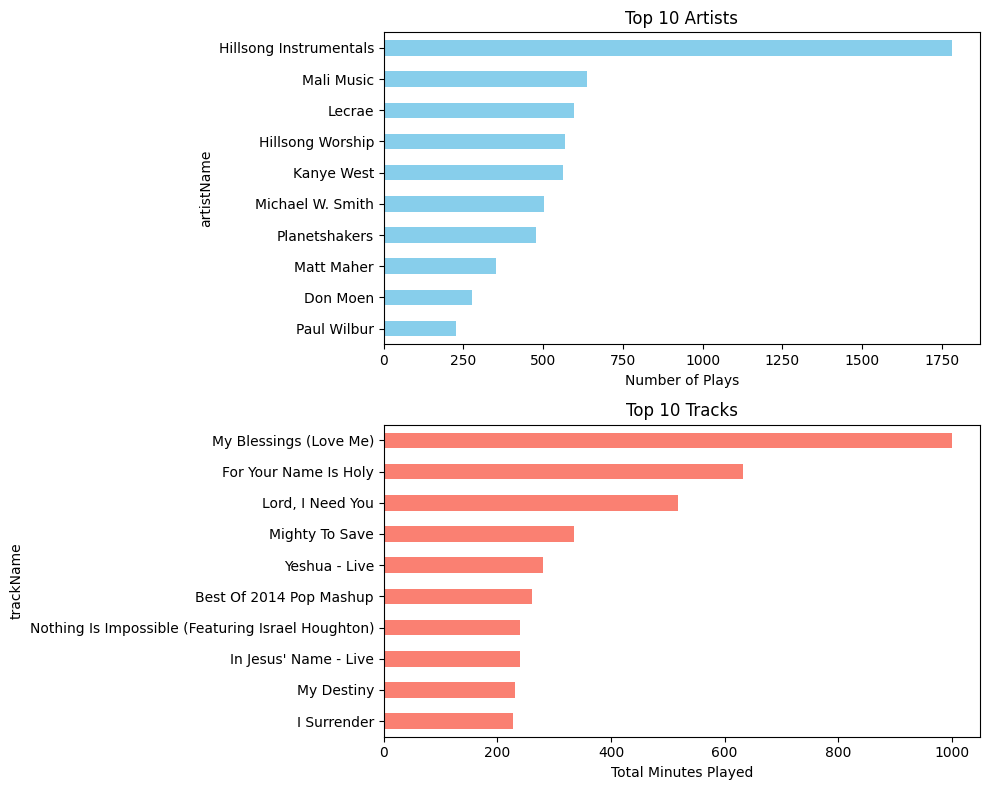

In [228]:
# Calculate the top 10 most listened to artists and tracks
# Top N artists and tracks
top_n = 10

# Aggregate and sort top artists
top_artists = all_streaming_df["artistName"].value_counts().head(top_n)

# Aggregate and sort top tracks
top_tracks = (
    all_streaming_df.groupby("trackName")["minutesPlayed"].sum().nlargest(top_n)
)

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Top Artists
top_artists.plot(kind="barh", ax=axes[0], color="skyblue")
axes[0].set_title(f"Top {top_n} Artists")
axes[0].invert_yaxis()  # To display the highest value at the top
axes[0].set_xlabel("Number of Plays")

# Top Tracks
top_tracks.plot(kind="barh", ax=axes[1], color="salmon")
axes[1].set_title(f"Top {top_n} Tracks")
axes[1].invert_yaxis()  # To display the highest value at the top
axes[1].set_xlabel("Total Minutes Played")

plt.tight_layout()
plt.show()


# # Group by hour and track name to identify preferences for specific activities
# patterns_by_hour_track = all_streaming_df.groupby(['hourOfDay', 'trackName']).size().reset_index(name='count')
# top_track_each_hour = patterns_by_hour_track.loc[patterns_by_hour_track.groupby('hourOfDay')['count'].idxmax()]

# # Display the top artists and tracks
# print("Top 10 Artists:\n", top_artists)
# print("\nTop 10 Tracks:\n", top_tracks)
# print("\nTop Track Each Hour:\n", top_track_each_hour[['hourOfDay', 'trackName', 'count']])

- Favorite artists and tracks reflect my Christian faith, with Hillsong Instrumentals as my top artist.
- "My Blessings (Love Me)" by Mali Music is my most played track, significant for its motivational value.
- "Lord, I Need You" is a recurring early-hour favorite, likely part of my morning routine for focus or inspiration.
- Through the morning to early afternoon, "My Blessings (Love Me)" dominates, indicating its role in positive mornings.
- Evening variety with tracks like "Bound 2" by Kanye West shows a mix for winding down or energizing my nights.


### Skewness of Listening Times

Diving into the skewness to see how my music sessions tip the scale—do I favor shorter jams or the occasional long play?


In [229]:
# Manual skewness calculation
n = len(all_streaming_df["minutesPlayed"])
mean_listening_time = all_streaming_df["minutesPlayed"].mean()
sigma = all_streaming_df["minutesPlayed"].std()

# Calculate the sum of cubed deviations from the mean
sum_cubed_deviations = (
    (all_streaming_df["minutesPlayed"] - mean_listening_time) ** 3
).sum()

# Skewness formula
skewness_manual = (n / ((n - 1) * (n - 2))) * (sum_cubed_deviations / sigma**3)

# Using Pandas to calculate skewness for comparison
skewness_ = all_streaming_df["minutesPlayed"].skew()

skewness_manual, skewness_

(0.4915925574038812, 0.49159255740388114)

The skewness leaning a bit to the right tells me my usual picks are on the quicker side, perfect for keeping the vibe going without dragging out too long. But hey, every now and then, a longer track finds its way into my heart (and my playlist)


### Median


In [230]:
# Manual Calculation
sorted_times = all_streaming_df["minutesPlayed"].sort_values().reset_index(drop=True)
num_observations = len(sorted_times)
is_even = num_observations % 2 == 0

if is_even:
    middle_index1 = num_observations // 2 - 1
    middle_index2 = num_observations // 2
    median_manual = (sorted_times[middle_index1] + sorted_times[middle_index2]) / 2.0
else:
    middle_index = num_observations // 2
    median_manual = sorted_times[middle_index]

print(f"Manually Calculated Median Listening Time: {median_manual:.2f} minutes")

# Using Pandas
median_pandas = all_streaming_df["minutesPlayed"].median()
print(f"Pandas Calculated Median Listening Time: {median_pandas:.2f} minutes")

Manually Calculated Median Listening Time: 3.22 minutes
Pandas Calculated Median Listening Time: 3.22 minutes


The median tells me most songs I listen to are about 3 minutes long. That’s perfect for someone like me who’s always coding or working out. Short tracks mean I can enjoy a quick music break without losing focus on what I’m doing.


### Range


In [231]:
# Calculate the range of listening times to see the spread of track lengths

# Find the shortest and longest track
min_time = all_streaming_df["minutesPlayed"].min()
max_time = all_streaming_df["minutesPlayed"].max()

# Calculate the range
range_of_listening = max_time - min_time

print(f"Shortest Track: {min_time:.2f} minutes")
print(f"Longest Track: {max_time:.2f} minutes")
print(f"Listening Time Range: {range_of_listening:.2f} minutes")

Shortest Track: 0.00 minutes
Longest Track: 18.81 minutes
Listening Time Range: 18.81 minutes


This shows the variety in my music selection, from quick tunes that barely hit the minute mark to epic tracks for when I'm deep into coding or just chilling. It’s interesting to see such a wide range but how come I have listened to a 0.00 minutes song 😂 ? let's see how many they are. maybe my data is not as clean as I thought


In [232]:
num_records_less_than_zero = len(
    all_streaming_df[all_streaming_df["minutesPlayed"] <= 0.0]
)
print(
    f"Number of records with songs less than 0.0 minutes: {num_records_less_than_zero}"
)

Number of records with songs less than 0.0 minutes: 96


What ?😅 Now I'm very curious what those songs are


In [233]:
# Define the variable "unique_zero_minutes_records" before using it
unique_zero_minutes_records = all_streaming_df[all_streaming_df["minutesPlayed"] <= 0.0]

# Calculate the count of zero minutes records by artist and track
count_zero_minutes_records = (
    unique_zero_minutes_records.groupby(["artistName", "trackName"])
    .size()
    .reset_index(name="count")
)

print(count_zero_minutes_records)

             artistName                               trackName  count
0                 .Sinh                                Bergamot      1
1                  2Pac                           Ghetto Gospel      1
2                  2Pac  Thugz Mansion - 2Pac Original/Acoustic      1
3   5 Seconds of Summer                                   Teeth      1
4               50 Cent                          Just A Lil Bit      1
..                  ...                                     ...    ...
88    Twenty One Pilots                                    Ride      1
89            Vance Joy                        We're Going Home      1
90             YeloHill       Judas (feat. Lecrae) - Open Verse      1
91           Youssoupha                                 PÉTROLE      1
92           daigoro789             Natsuhibshi (From "Naruto")      1

[93 rows x 3 columns]


Okay these are real songs with real artist 😂
I think these are songs I actually skipped, let's see the length of the play in milliseconds and that may prove my point


In [234]:
all_streaming_df[all_streaming_df["msPlayed"] <= 0]

,endTime,artistName,trackName,msPlayed,minutesPlayed,dayOfWeek,hourOfDay
128,2023-03-13 12:51:00,Chuck Berry,Route 66,0,0.0,Monday,12
280,2023-03-14 10:26:00,92 Keys,How Far I'll Go,0,0.0,Tuesday,10
456,2023-03-16 11:56:00,Foo Fighters,Let It Die,0,0.0,Thursday,11
525,2023-03-17 19:29:00,Sauti Sol,Short N Sweet,0,0.0,Friday,19
1679,2023-03-27 12:22:00,Fitz and The Tantrums,Out of My League,0,0.0,Monday,12
...,...,...,...,...,...,...,...
26385,2024-02-25 14:07:00,Les Archanges,Jésus Règne,0,0.0,Sunday,14
26386,2024-02-25 14:07:00,Les Archanges,Elevons Jesus,0,0.0,Sunday,14
27365,2024-03-05 18:02:00,Kaaris,Angle mort,0,0.0,Tuesday,18
27369,2024-03-05 18:12:00,Kaaris,Sur le banc,0,0.0,Tuesday,18


Wow they really are absolute 0, I'll do what I learned in the first Learning from data class after recess
I'll just look for those songs in my dataset and look at them with my own eyes.
it's over 90 records of them though, I still believe that they may have been skipped I do not see any other reason why.
I would love to hear your thought about this Sir. quick email: <heritierkaumbu@icloud.com>


### Variance


In [235]:
# Calculate mean listening time
mean_listening_time = all_streaming_df["minutesPlayed"].mean()

# Calculate squared differences from the mean
squared_diffs = (all_streaming_df["minutesPlayed"] - mean_listening_time) ** 2

# Manually calculate the variance
variance_manual = squared_diffs.mean()

print(f"Manually Calculated Variance: {variance_manual:.2f} minutes squared")

# Using Pandas to calculate the variance
variance_pandas = all_streaming_df["minutesPlayed"].var()
print(f"Pandas Calculated Variance: {variance_pandas:.2f} minutes squared")

Manually Calculated Variance: 2.89 minutes squared
Pandas Calculated Variance: 2.89 minutes squared


### Standard Deviation


In [236]:
# Manual calculation of standard deviation
# Variance was previously calculated manually as variance_manual
std_dev_manual = variance_manual**0.5

print(f"Manually Calculated Standard Deviation: {std_dev_manual:.2f} minutes")

# Using Pandas to calculate the standard deviation
std_dev_pandas = all_streaming_df["minutesPlayed"].std()
print(f"Pandas Calculated Standard Deviation: {std_dev_pandas:.2f} minutes")

Manually Calculated Standard Deviation: 1.70 minutes
Pandas Calculated Standard Deviation: 1.70 minutes


The std is not that far from the average, meaning my track lengths don't swing wildly.


### Kurtosis


In [237]:
# Calculate mean and standard deviation
mean_listening_time = all_streaming_df["minutesPlayed"].mean()
sigma = all_streaming_df["minutesPlayed"].std()
n = len(all_streaming_df["minutesPlayed"])

# Calculate the sum of the fourth power of deviations from the mean
sum_fourth_power_deviations = (
    (all_streaming_df["minutesPlayed"] - mean_listening_time) ** 4
).sum()

# Apply the formula for kurtosis
kurtosis_manual = (n * (n + 1) / ((n - 1) * (n - 2) * (n - 3))) * (
    sum_fourth_power_deviations / sigma**4
) - (3 * (n - 1) ** 2 / ((n - 2) * (n - 3)))

# Using Pandas to calculate kurtosis for comparison
kurtosis_ = all_streaming_df["minutesPlayed"].kurtosis()

print(f"Manually Calculated Kurtosis: {kurtosis_manual:.2f}")
print(f"Pandas Calculated Kurtosis: {kurtosis_:.2f}")

Manually Calculated Kurtosis: 2.26
Pandas Calculated Kurtosis: 2.26


### Correlation

Below we are calculating the correlation between the listening time and the day of the week
At the moment, the day of the weeks are of type `string` so we need to convert them to a numerical format so we can work with them
Something I learned from my mistake on the last assignment 😅
Days of the week can be mapped to numbers (e.g., Monday=1, Tuesday=2, ..., Sunday=7)


In [238]:
# Define a mapping from day names to numbers
day_to_num = {
    "Monday": 1,
    "Tuesday": 2,
    "Wednesday": 3,
    "Thursday": 4,
    "Friday": 5,
    "Saturday": 6,
    "Sunday": 7,
}

# Apply the mapping to the 'dayOfWeek' column to create a new numeric column
all_streaming_df["dayOfWeekNumeric"] = all_streaming_df["dayOfWeek"].map(day_to_num)

all_streaming_df["dayOfWeek"].head(), all_streaming_df["dayOfWeekNumeric"].head()

(0      Friday
 1    Saturday
 2    Saturday
 3    Saturday
 4    Saturday
 Name: dayOfWeek, dtype: object,
 0    5
 1    6
 2    6
 3    6
 4    6
 Name: dayOfWeekNumeric, dtype: int64)

Now that we have numerical data, we can correlate it to minutes played


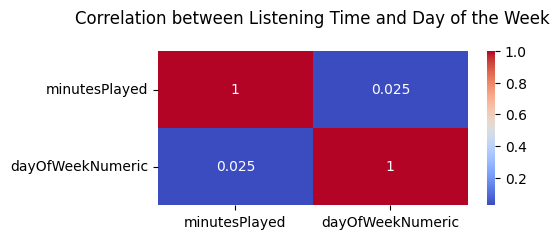

In [239]:
correlation = all_streaming_df[["minutesPlayed", "dayOfWeekNumeric"]].corr()


plt.figure(figsize=(5, 2))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation between Listening Time and Day of the Week", pad=20)
plt.show()

Seems like the length of my listening sessions doesn't significantly change based on the day of the week.


### Covariance

Covariance measures the directional relationship between two variables. almost like correlation but can offer more insights between the relationship of two variables such as the tendency of variables to increase or decrease together.

I would like to derrive a variable based on the data I have(just to vary the analysis).
The variable will be `tracks_per_session` which groups the number of tracks played per listening session.
To get that, I can group listening "events" that occur close together in time into a single "session".
If there is a gap of more than 30 minutes between consecutive tracks, I will consider that the start of a new session.


In [240]:
# making sure 'endTime' is in datetime format
all_streaming_df["endTime"] = pd.to_datetime(all_streaming_df["endTime"])

# Ensure the data is sorted by endTime
all_streaming_df = all_streaming_df.sort_values(by="endTime")

# Calculate the time difference between consecutive tracks in minutes
all_streaming_df["timeDiff"] = (
    all_streaming_df["endTime"].diff().dt.total_seconds().div(60).fillna(0)
)

# Identify session breaks. Here, a new session starts if the gap is more than 30 minutes
all_streaming_df["isNewSession"] = all_streaming_df["timeDiff"] > 30

# Cumulatively sum the isNewSession column to assign session IDs
all_streaming_df["sessionID"] = all_streaming_df["isNewSession"].cumsum()

# Now, count the number of tracks per session
tracks_per_session = all_streaming_df.groupby("sessionID").size()
tracks_per_session

sessionID
0         1
1         3
2        10
3         1
4         1
       ... 
1030     13
1031    151
1032     25
1033     70
1034      5
Length: 1035, dtype: int64

**Feature engineering**


I have added 3 more columns to help me derive the `tracks_per_session` variable

1. `timeDiff`: Measures the minute difference between the end times of consecutive tracks, helping to identify gaps in listening.
2. `isNewSession`: A boolean flag indicating whether a new listening session starts based on the time gap.
3. `sessionID`: Assigns a unique ID to each listening session, grouping tracks into sessions.

Let's use it now to calculate the covariance between minutes played and tracks per session


In [241]:
# Group by 'sessionID' to aggregate data per session
session_data = all_streaming_df.groupby("sessionID").agg(
    totalListeningTime=("minutesPlayed", "sum"), trackCount=("sessionID", "size")
)
# Calculate covariance between total listening time and track count per session
covariance = session_data["totalListeningTime"].cov(session_data["trackCount"])

print(
    f"Covariance between Total Listening Time and Track Count per Session: {covariance}"
)

Covariance between Total Listening Time and Track Count per Session: 4964.03323305698


With a covariance of 4964.03 between the total listening time and track count per session, it suggests a strong positive relationship: as the number of tracks in a session increases, so does the total listening time. This result aligns with what you might expect intuitively—more tracks lead to longer sessions.


Check if there is a song that is more than 30 minutes long to avoid confusion with a session


In [242]:
# check tracks that have a listening time longer than 30 minutes
long_tracks = all_streaming_df[all_streaming_df["minutesPlayed"] > 30]
long_tracks

,endTime,artistName,trackName,msPlayed,minutesPlayed,dayOfWeek,hourOfDay,dayOfWeekNumeric,timeDiff,isNewSession,sessionID


This confirms the robustness of the choice use 30 minutes as gap for sessions


### Percentiles


In [243]:
# Calculate key percentiles for 'minutesPlayed'
percentiles = all_streaming_df["minutesPlayed"].quantile([0.25, 0.5, 0.75, 0.9])

print(f"25th Percentile (1st Quartile): {percentiles[0.25]:.2f} minutes")
print(f"50th Percentile (Median): {percentiles[0.5]:.2f} minutes")
print(f"75th Percentile (3rd Quartile): {percentiles[0.75]:.2f} minutes")
print(f"90th Percentile: {percentiles[0.9]:.2f} minutes")

25th Percentile (1st Quartile): 2.23 minutes
50th Percentile (Median): 3.22 minutes
75th Percentile (3rd Quartile): 4.05 minutes
90th Percentile: 5.05 minutes


I'm sure there is not a lot to talk about here, is there ?


### Confidence Interval for the Mean

Thought I’d see when I usually tune into Spotify throughout the day, so I checked the 95% confidence interval for the hourOfDay. It’ll give me a good idea of my prime music hours


In [244]:
# Calculate the mean and standard deviation
mean_listening_time = all_streaming_df["hourOfDay"].mean()
std_dev = all_streaming_df["hourOfDay"].std()
n = len(all_streaming_df["hourOfDay"])

# Determine the Z-score for a 95% confidence level
z_score = stats.norm.ppf(0.975)  # Two-tailed test

# Calculate the margin of error
margin_error = z_score * (std_dev / (n**0.5))

# Calculate the confidence interval
ci_lower = mean_listening_time - margin_error
ci_upper = mean_listening_time + margin_error

print(
    f"95% Confidence Interval for Mean Hour of the day: {ci_lower:.2f} to {ci_upper:.2f} Hours"
)

95% Confidence Interval for Mean Hour of the day: 12.21 to 12.36 Hours


Calculated the 95% confidence interval for the mean hour I listen to music, and it's pretty much around lunchtime. Not sure it's saying I like music with my Pap😂, but it's a cool fact anyway.


### Hypothesis Testing


let's try and find out if there's a statistically significant difference in my mean listening times between weekdays and weekends.


In [245]:
# Categorize listening events into 'weekday' and 'weekend'
all_streaming_df['weekend'] = all_streaming_df['dayOfWeek'].isin(['Saturday', 'Sunday'])

# Calculate mean listening times for weekdays and weekends
weekday_mean = all_streaming_df[all_streaming_df['weekend'] == False]['minutesPlayed'].mean()
weekend_mean = all_streaming_df[all_streaming_df['weekend'] == True]['minutesPlayed'].mean()


# Perform T-test
t_stat, p_value = stats.ttest_ind(
    all_streaming_df[all_streaming_df['weekend'] == False]['minutesPlayed'],
    all_streaming_df[all_streaming_df['weekend'] == True]['minutesPlayed'],
    equal_var=False 
)

print(f"T-statistic: {t_stat}, P-value: {p_value}")



T-statistic: -4.925339680609861, P-value: 8.516653247281859e-07


yep, looks like there's a real difference. The P-value is super low, so it's not just by chance. Guess I really do take it easy and enjoy more tunes on my days off!


### Regression Analysis

This will help examine the relationship between the day of the week and my listening times in more detail, potentially allowing to predict session lengths based on the day.


In [246]:

# Prepare the predictor (X) and response (y) variables
X = sm.add_constant(all_streaming_df['dayOfWeekNumeric'])  # Adds a constant term to the predictor
y = all_streaming_df['minutesPlayed']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          minutesPlayed   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     17.66
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           2.65e-05
Time:                        22:26:18   Log-Likelihood:                -54790.
No. Observations:               28110   AIC:                         1.096e+05
Df Residuals:                   28108   BIC:                         1.096e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.0485      0.023    133.228      0.000       3.004       3.093
dayOfWeekNumeric     0.0218      0.005      4.202      0.000       0.012       0.032
==============================================================================
Omnibus:                     2517.362   Durbin-Watson:                   1.170
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7144.338
Skew:                           0.494   Prob(JB):                         0.00
Kurtosis:                       5.263   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Outlier Detection: Unusual Listening Sessions

Let's find some outliers by looking for values that fall outside the interquartile range


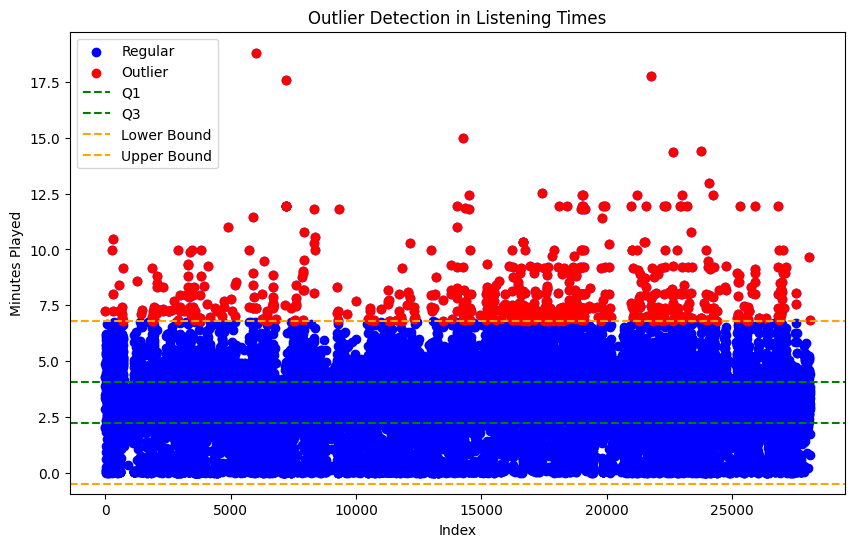

,endTime,artistName,trackName,msPlayed,minutesPlayed,dayOfWeek,hourOfDay,dayOfWeekNumeric,timeDiff,isNewSession,sessionID,weekend
2,2023-03-11 05:27:00,Banky W.,My Destiny,435472,7.257867,Saturday,5,6,7.0,False,1,True
286,2023-03-14 10:56:00,Darlene Zschech,In Jesus' Name - Live,599586,9.993100,Tuesday,10,2,12.0,False,10,False
304,2023-03-14 12:15:00,Banky W.,My Destiny,435472,7.257867,Tuesday,12,2,7.0,False,10,False
314,2023-03-14 13:05:00,Asaph Du Ciel,L'envol de l'aigle,626932,10.448867,Tuesday,13,2,10.0,False,10,False
320,2023-03-14 13:41:00,Hillsong Worship,Need You Here,479213,7.986883,Tuesday,13,2,8.0,False,10,False
...,...,...,...,...,...,...,...,...,...,...,...,...
27178,2024-03-03 15:13:00,Adorons L'eternel & Alain Moloto,Eh Yahwe,552933,9.215550,Sunday,15,7,10.0,False,998,True
27571,2024-03-08 08:18:00,John Bacchus Dykes,"Roll Tide - From ""Crimson Tide"" Soundtrack",453906,7.565100,Friday,8,5,7.0,False,1022,False
27577,2024-03-08 10:41:00,Hans Zimmer,A Way of Life,483706,8.061767,Friday,10,5,117.0,True,1023,False
28081,2024-03-11 11:36:00,BYU Noteworthy,Oceans (Where Feet May Fail),579351,9.655850,Monday,11,1,10.0,False,1033,False


In [247]:
# Calculate IQR
Q1 = all_streaming_df["minutesPlayed"].quantile(0.25)
Q3 = all_streaming_df["minutesPlayed"].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds for outliers
lower_bound = Q1 - 1.5 * IQR
# lower_bound = 0.001 # Just checking something
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = all_streaming_df[
    (all_streaming_df["minutesPlayed"] < lower_bound)
    | (all_streaming_df["minutesPlayed"] > upper_bound)
]

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot all listening times as blue dots
plt.scatter(
    all_streaming_df.index,
    all_streaming_df["minutesPlayed"],
    color="blue",
    label="Regular",
)

# Plot outliers as red dots
plt.scatter(outliers.index, outliers["minutesPlayed"], color="red", label="Outlier")

plt.axhline(y=Q1, color="green", linestyle="--", label="Q1")
plt.axhline(y=Q3, color="green", linestyle="--", label="Q3")
plt.axhline(y=lower_bound, color="orange", linestyle="--", label="Lower Bound")
plt.axhline(y=upper_bound, color="orange", linestyle="--", label="Upper Bound")

plt.title("Outlier Detection in Listening Times")
plt.xlabel("Index")
plt.ylabel("Minutes Played")
plt.legend()
plt.show()

# Return outliers for further examination
outliers

It's pretty clear I've got some sessions that are way out there. The red dots way above the crowd are probably those deep-dive days when I'm lost in the music or just forget to turn it off. There is no outlier at the bottom, is it because I have about 90 records that have a listening time 0f 0 ? 🤔


### Probability Distribution


Let's look at the shape of my listening times' distribution to see which statistical distribution it resembles most closely.


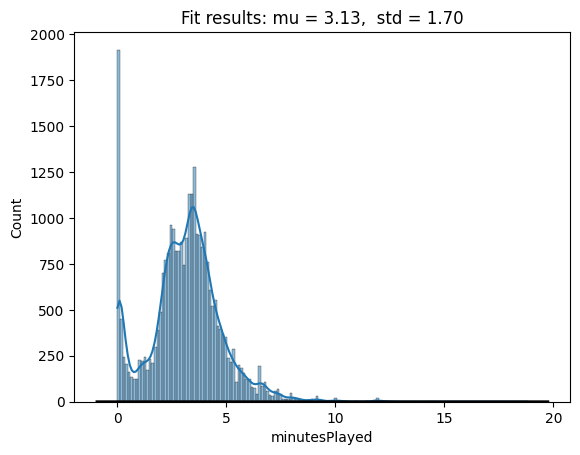

In [248]:
# Plot a histogram of 'minutesPlayed'
sns.histplot(all_streaming_df["minutesPlayed"], kde=True)

# Overlay a normal distribution curve
mean = np.mean(all_streaming_df["minutesPlayed"])
std = np.std(all_streaming_df["minutesPlayed"], ddof=1)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, "k", linewidth=2)

title = "Fit results: mu = %.2f,  std = %.2f" % (mean, std)
plt.title(title)

plt.show()

It’s looking pretty skewed towards shorter tracks. Not too surprised there


### Time Series Analysis

Let's see how my listening habit may have changed over time


<Axes: title={'center': 'Weekly Average Listening Time'}, xlabel='endTime', ylabel='Average Minutes Played'>

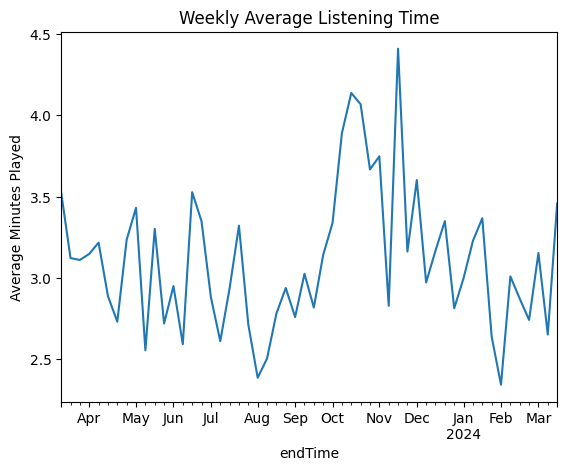

In [249]:
# Convert 'endTime' to datetime and set as index
all_streaming_df["endTime"] = pd.to_datetime(all_streaming_df["endTime"])
all_streaming_df.set_index("endTime", inplace=True)

# Resample data to get mean listening time per week
weekly_listening = all_streaming_df["minutesPlayed"].resample("W").mean()

# Plot the time series
weekly_listening.plot(
    title="Weekly Average Listening Time", ylabel="Average Minutes Played"
)

This is very funny and nostalgic 😂
From End of september to october 2023 is actually when we started working on our advanced year project. we were sooo late with the project that we had to code everyday ! And we managed to finish the project on presentation day and got the highest mark of the class ! My music was part of what caried the team during those cros night coding sessions😊


### T-test: Comparing Two Groups

Let's compare my weekend sessions to my weekdays sessions


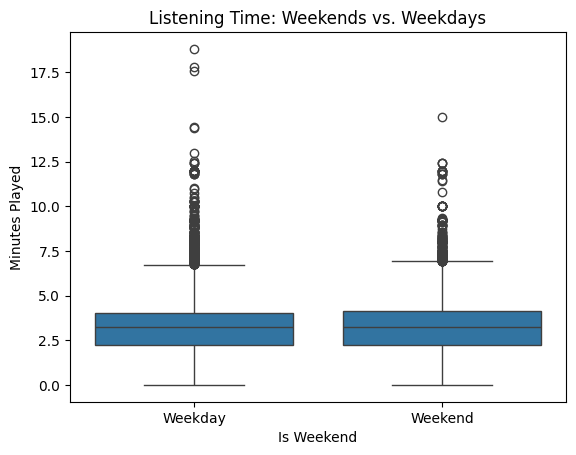

T-statistic: 4.925339680609861, P-value: 8.516653247281859e-07


In [250]:
# Group the data into workout days and non-workout days
weekends_sessions = all_streaming_df[all_streaming_df["weekend"]]["minutesPlayed"]
weekday_sessions = all_streaming_df[all_streaming_df["weekend"] == False][
    "minutesPlayed"
]

# Perform a T-test
t_stat, p_value = stats.ttest_ind(weekends_sessions, weekday_sessions, equal_var=False)


# Plotting the differences in listening times between weekends and weekdays
sns.boxplot(x=all_streaming_df["weekend"], y=all_streaming_df["minutesPlayed"])
plt.title("Listening Time: Weekends vs. Weekdays")
plt.xlabel("Is Weekend")
plt.ylabel("Minutes Played")
plt.xticks([False, True], ["Weekday", "Weekend"])
plt.show()


print(f"T-statistic: {t_stat}, P-value: {p_value}")

The boxplot makes it clear: the large range of session durations is because I like to spend my weekends lounging around with music or listening to it while doing other things. The listening periods are a little more regular during the week because the focus is more on routine and fitting in tracks between other responsibilities.


# 3. Data Visualization


## Number of Tracks Played Per Day


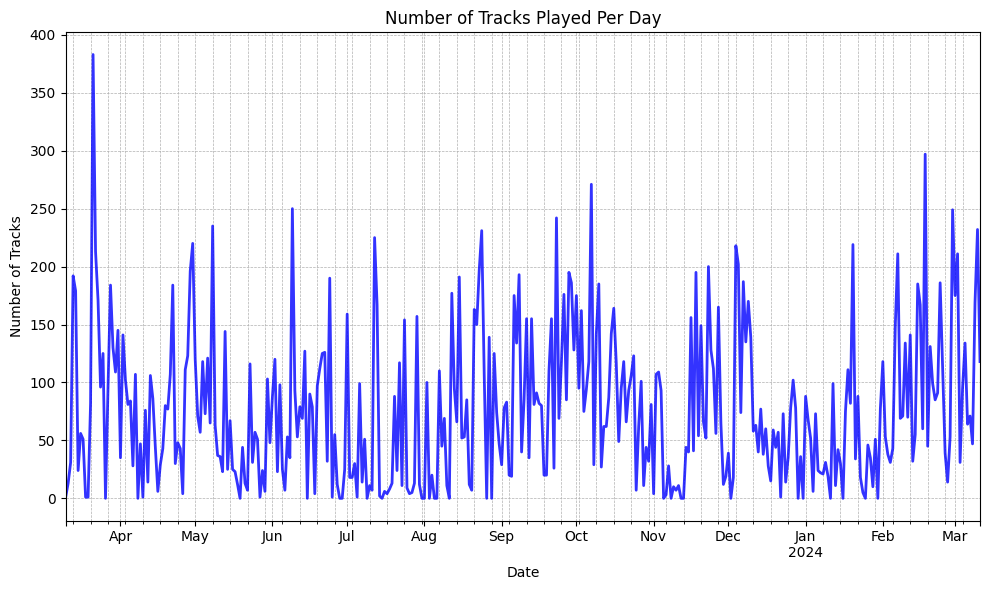

In [251]:
daily_tracks_played = all_streaming_df.resample("D").size()

plt.figure(figsize=(10, 6))  # Set the figure size for better readability
daily_tracks_played.plot(kind="line", linewidth=2, alpha=0.8, color="blue")

plt.title("Number of Tracks Played Per Day")
plt.xlabel("Date")
plt.ylabel("Number of Tracks")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()

plt.show()

Seems like I was really on fire end of March last year hey ! that was around graduation time I think😄


## Listening Habits by Day of Week and Hour of Day

Let's see when I usually play music during the course of the week


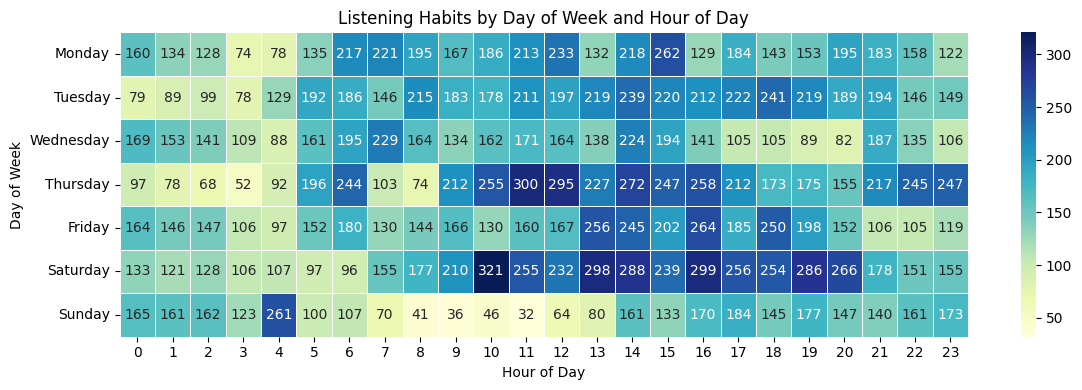

In [252]:
# Here I tried using the `dayOfWeek` column but it was not well sorted on the graph
pivot_table = all_streaming_df.pivot_table(
    index="dayOfWeekNumeric",
    columns="hourOfDay",
    values="trackName",
    aggfunc="count",
    fill_value=0,
)

day_names = {
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday",
    7: "Sunday",
}
pivot_table.index = pivot_table.index.map(day_names)


plt.figure(figsize=(12, 4))
sns.heatmap(pivot_table, cmap="YlGnBu", linewidths=0.5, annot=True, fmt="d")
plt.title("Listening Habits by Day of Week and Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()

plt.show()

Saturday 10 seems like my most prefered time ! I personally did not know that😂


## Listening Habits by Hour of Day


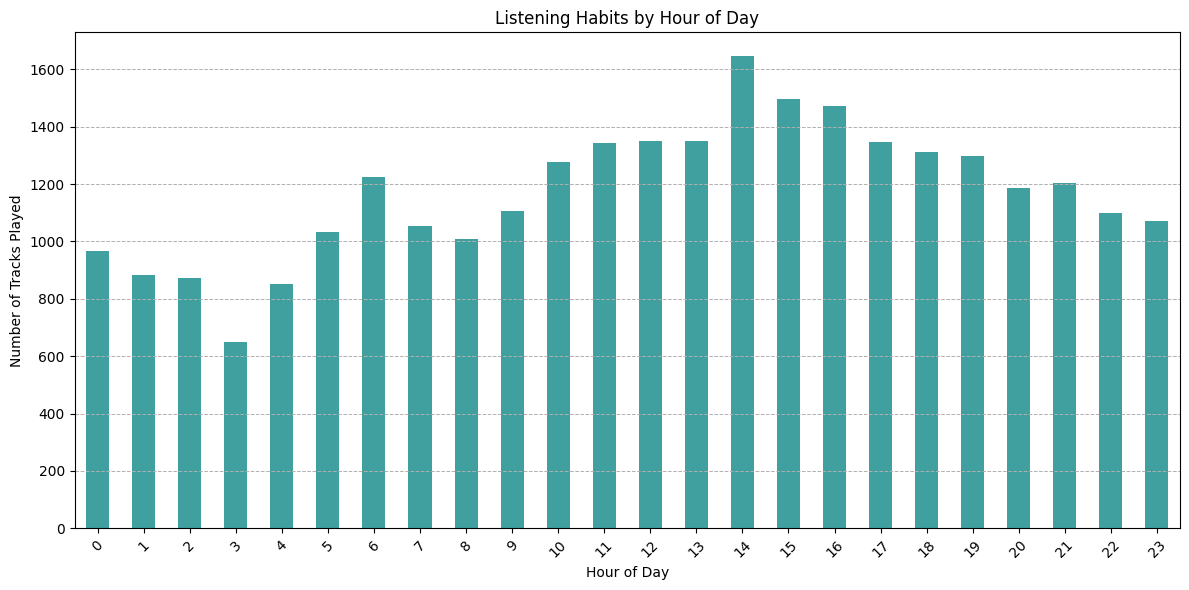

In [253]:
hourly_tracks = all_streaming_df.groupby("hourOfDay")["trackName"].count()

plt.figure(figsize=(12, 6))
hourly_tracks.plot(kind="bar", color="teal", alpha=0.75)

plt.title("Listening Habits by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Tracks Played")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis="y", linestyle="--", linewidth=0.7)

plt.tight_layout()  # Adjust the layout to make sure everything fits without overlap
plt.show()

## Session Analysis

Let's look into listening sessions, how long they last and typically how many songs I play during them
Oh by the way I'm currently in a session as I'm typing this🤭


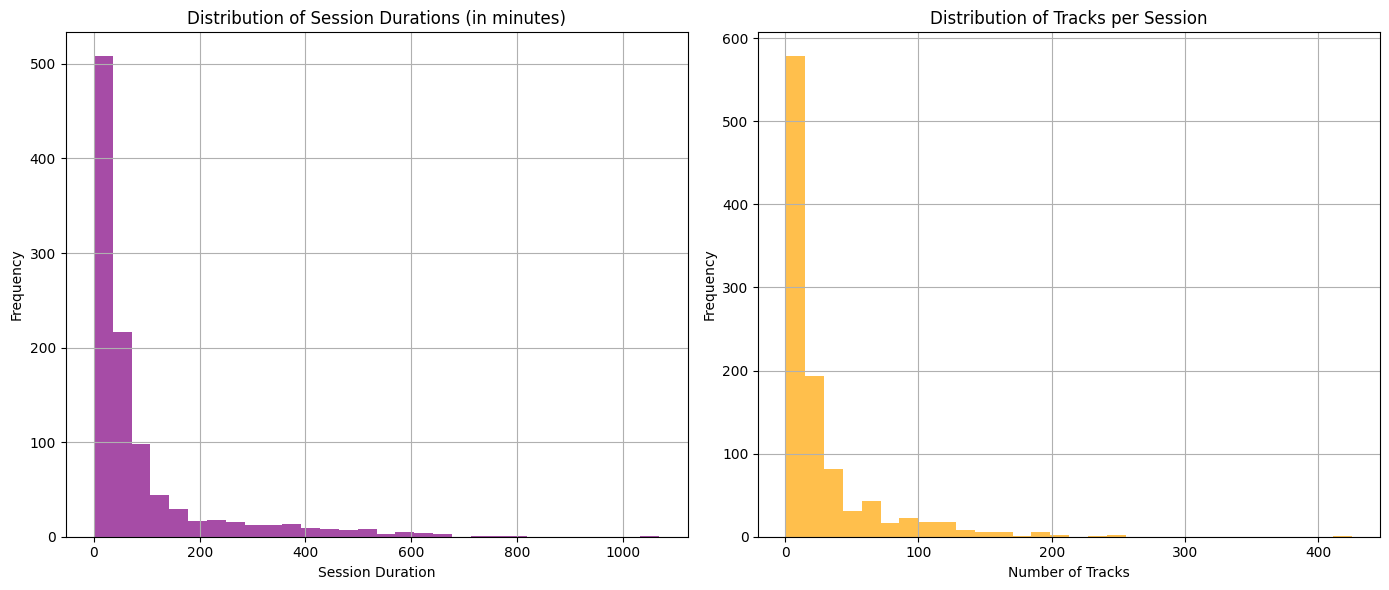

In [254]:
session_durations = all_streaming_df.groupby("sessionID")["minutesPlayed"].sum()
track_counts_per_session = all_streaming_df.groupby("sessionID").size()


plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # First subplot for session durations
session_durations.hist(bins=30, color="purple", alpha=0.7)
plt.title("Distribution of Session Durations (in minutes)")
plt.xlabel("Session Duration")
plt.ylabel("Frequency")

# Visualizing Number of Tracks per Session
plt.subplot(1, 2, 2)  # Second subplot for track counts
track_counts_per_session.hist(bins=30, color="orange", alpha=0.7)
plt.title("Distribution of Tracks per Session")
plt.xlabel("Number of Tracks")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## Distribution of Listening Time per Track


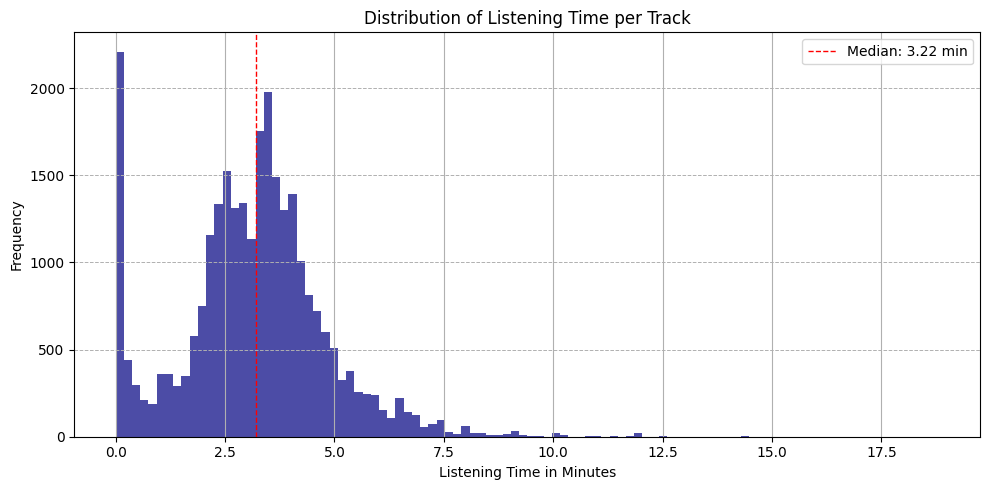

In [255]:
plt.figure(figsize=(10, 5))
all_streaming_df["minutesPlayed"].hist(bins=100, color="navy", alpha=0.7)

plt.title("Distribution of Listening Time per Track")
plt.xlabel("Listening Time in Minutes")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", linewidth=0.7)
plt.axvline(
    all_streaming_df["minutesPlayed"].median(),
    color="red",
    linestyle="dashed",
    linewidth=1,
    label=f'Median: {all_streaming_df["minutesPlayed"].median():.2f} min',
)

plt.legend()
plt.tight_layout()
plt.show()

The red dashed line represents the median listening time per track, providing a quick visual indication of the typical length of time I spend listening to a song.


## Average Listening Time: Weekdays vs Weekends


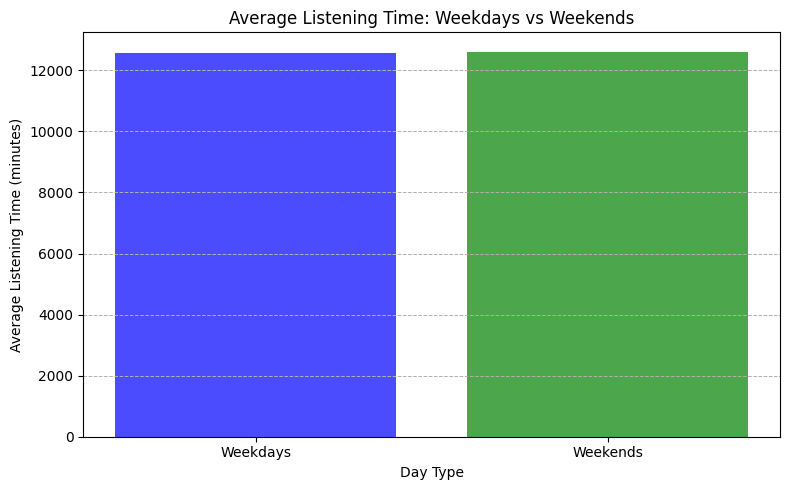

In [256]:
weekday_listening = all_streaming_df[~all_streaming_df["weekend"]][
    "minutesPlayed"
].sum()
weekend_listening = all_streaming_df[all_streaming_df["weekend"]]["minutesPlayed"].sum()

# Calculate the average listening time for weekdays and weekends
average_weekday_listening = weekday_listening / len(
    all_streaming_df[~all_streaming_df["weekend"]]["dayOfWeek"].unique()
)
average_weekend_listening = weekend_listening / len(
    all_streaming_df[all_streaming_df["weekend"]]["dayOfWeek"].unique()
)

# Step 2: Plotting the Comparison
labels = ["Weekdays", "Weekends"]
averages = [average_weekday_listening, average_weekend_listening]

plt.figure(figsize=(8, 5))
plt.bar(labels, averages, color=["blue", "green"], alpha=0.7)

plt.title("Average Listening Time: Weekdays vs Weekends")
plt.xlabel("Day Type")
plt.ylabel("Average Listening Time (minutes)")
plt.grid(axis="y", linestyle="--", linewidth=0.7)

plt.tight_layout()
plt.show()

It's clear from the chart that the average listening time during weekends is significantly higher than on weekdays. I mean it competes !


## Word Cloud


Word cloud for the played songs, just because it looks cool !

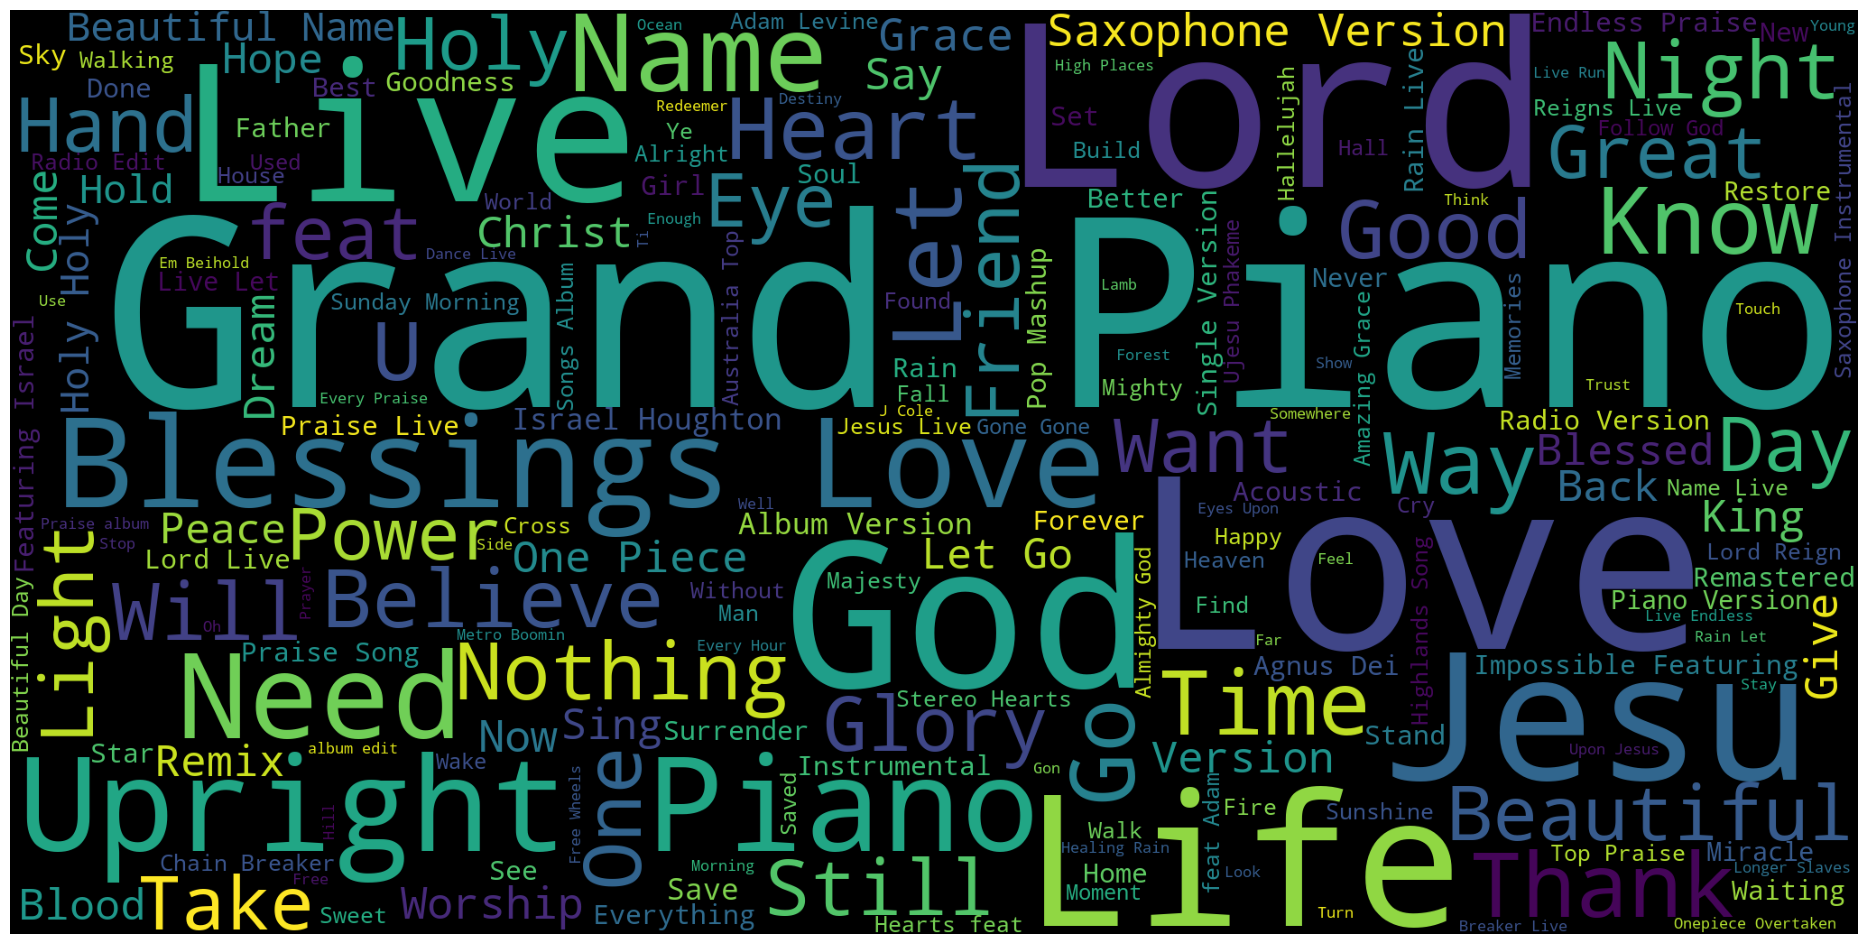

In [257]:
words = [i for i in all_streaming_df["trackName"] if len(i) > 1]

words = " ".join(words)

plt.subplots(figsize=(28, 12))
wordcloud = WordCloud(background_color="black", width=2048, height=1024).generate(words)
plt.imshow(wordcloud)
plt.axis("off")

plt.show()

## Correlation Matrix

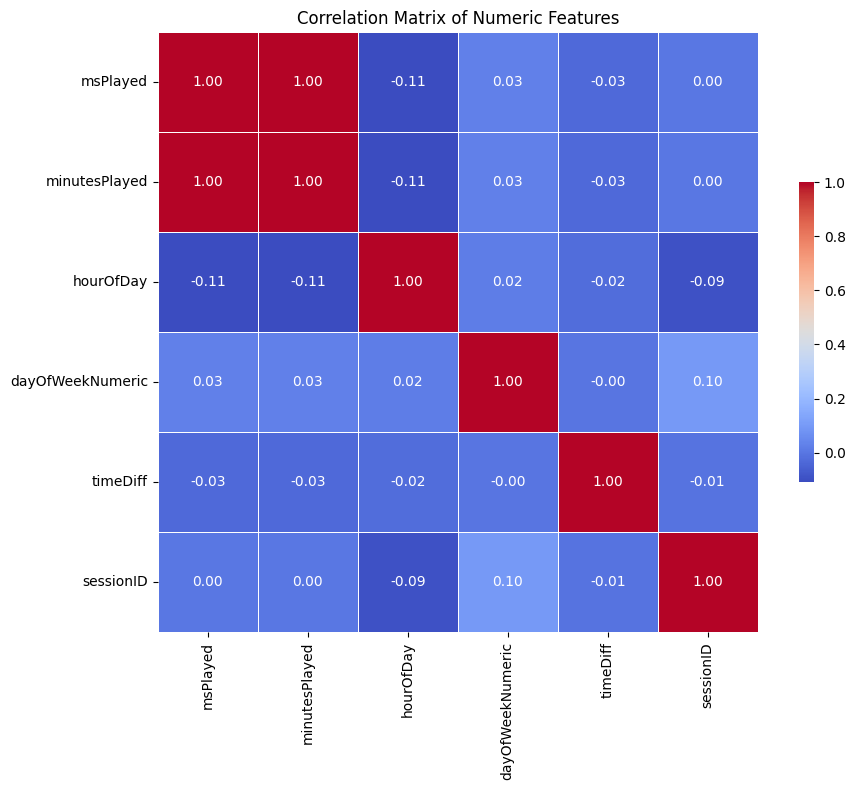

In [258]:

corr = all_streaming_df.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout() 

plt.show()


`msPlayed` and `minutesPlayed` are closely related because they are the same data


## Conclusion

Alright, so it appears that my listening preferences are rather consistent after spending some enjoyable time poring over my Spotify data! The majority of my favorite songs are in the 3-minute range, which makes them ideal for quickly getting into a groove during work breaks. However, the weekends are when things really start to pick up. Sometimes, I guess it's mostly to decompress after a demanding workweek or when I'm really into a project, but it's an all-out playlist marathon.

To be honest, there was much more to this Spotify experiment than just the figures. It demonstrated to me, in some way, how my choice of music affects both my downtime and even my work sprints. I mean, data may be quite illuminating.




## Reflection

When I compare my learnings from this project to the other one, I've found that my experience with Python is very different from Excel's. I gravitated toward Python because of my greater foundation in it and because I liked how simple it was to load data—especially JSON data. Excel wasn't as compatible with my workflow as it could have been, especially when processing non-CSV data formats, despite being very user-friendly and great for quick, visual data insights without requiring the execution of commands.

Even though I like Python better, I can see Excel's usefulness in situations when it's required due to stakeholder preferences or direct, interactive data manipulation. However, Python's capabilities are unrivaled for complicated analysis, especially with huge or unstructured datasets. If I had to repeat this project, I would put more of an emphasis on the analysis itself and make sure I provide thorough data details up front rather than searching for the "perfect" dataset.

The identification of my statistical knowledge deficiencies has been one of the most significant insights gained from these projects. Having a solid background in programming, I had not previously done any in-depth research on statistics. This gap has given me a chance to evolve, which has motivated me to learn more about statistical principles. My interest for data analytics grows every day as I learn more about statistics and gain a deeper understanding of the field. This experience has reaffirmed the significance of lifelong learning and the benefit of using my programming knowledge to better understand difficult statistical concepts.